In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 160

from toolbox import Preprocessing, Settings, VideoAnalysis, Visualize
from toolbox import Sampling, PredictionSample, IntervalSample

In [2]:
dataFile = Preprocessing.listDataFiles(excludeDataWithoutMovies=True)

propertyFile = Preprocessing.loadRunData(dataFile)
video = Preprocessing.loadVideo(dataFile)
matFile = Preprocessing.loadMatFile(dataFile)

In [3]:
fTPercentiles = np.linspace(.05, .60, 12)

fTValues = []
for i in range(len(matFile)):
    fTValues.append(matFile[i]["deltaF"])
    
fTValues = np.array([abs(val) for subList in fTValues for val in subList])
fTValues.sort()

fTArr = np.zeros(len(fTPercentiles))
for i in range(len(fTArr)):
    fTArr[i] = fTValues[int(len(fTValues)*fTPercentiles[i])]
    
print(fTArr)
#plt.hist(fTValues, bins=1000, density=True)
#plt.show()

[0.01638854 0.03321268 0.05019439 0.0689522  0.0859739  0.10295415
 0.12041    0.13719341 0.15413585 0.17068244 0.19074561 0.21270098]


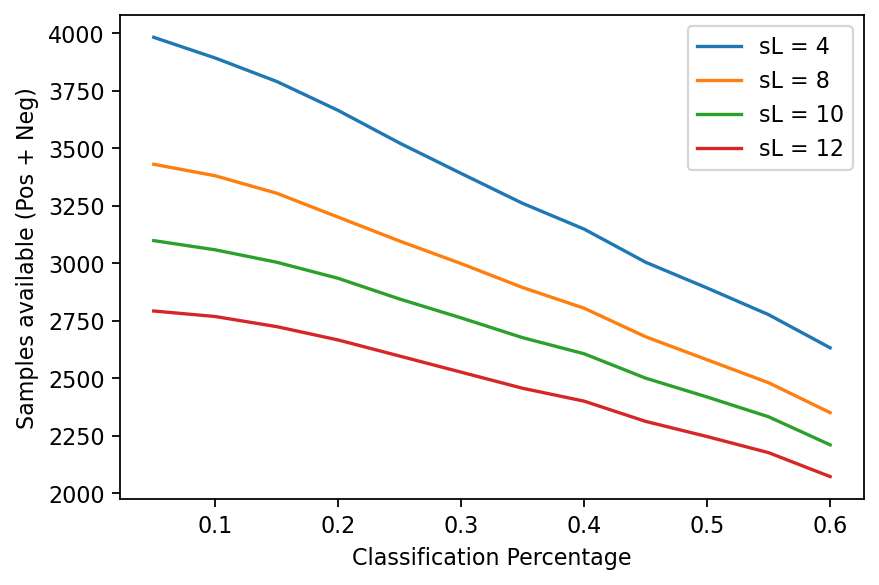

In [4]:
dataFile = Preprocessing.listDataFiles(excludeDataWithoutMovies=True)

propertyFile = Preprocessing.loadRunData(dataFile)
video = Preprocessing.loadVideo(dataFile)
matFile = Preprocessing.loadMatFile(dataFile)

scores = []
#fTArr = [0, .2, .4, .6, .8, 1.]
sampleLengthArr = [4, 8, 10, 12]

for sL in sampleLengthArr:
    samplesAvailable = np.zeros(len(fTArr))
    
    for i in range(len(fTArr)):
        inputs, outputs = PredictionSample.fullPredictionSample(video, propertyFile, matFile, scores, sampleLength=sL, forceEventThreshhold=fTArr[i])
        samplesAvailable[i] = np.shape(inputs)[0]
        
    plt.plot(fTPercentiles, samplesAvailable, label=f"sL = {sL}")
    
plt.legend()
plt.xlabel('Classification Percentage')
plt.ylabel('Samples available (Pos + Neg)')

#plt.title("Number of Training Samples vs. Classification Percen by Sample Length")

plt.savefig('images/SamplingTest_images/training_volume_estimate_percentages.png')
plt.show()